In [92]:
# Importing Library -------------%%%%

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns



In [93]:
# Authenticating Users ------------%%%%%%
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [94]:



downloaded = drive.CreateFile({'id':'1H3Dpt2nkyFhpap7CuATl_YGi2dXJFS7z'}) # replace the id with id of file you want to access
downloaded.GetContentFile('tv.csv')

downloaded = drive.CreateFile({'id':'1sn8YS229HGrSo_88xXwjtHjeMJJZTm8M'}) # replace the id with id of file you want to access
downloaded.GetContentFile('TEMP_USA.csv')

In [95]:
#imporing capitalbikeshare-tripdata dataset
temp = pd.read_csv("TEMP_USA.csv") 
temp.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,38.88481,-77.00609,2015,1,1,0.00,2.62,71.46,101.16,9.12,5.11,-4.02,-4.87,-0.39,3.70
1,38.88481,-77.00609,2015,1,2,0.00,3.16,73.91,101.57,7.84,6.07,-1.76,-2.33,1.79,4.81
2,38.88481,-77.00609,2015,1,3,4.49,4.18,96.42,101.75,5.26,4.38,-0.87,1.35,2.02,1.49
3,38.88481,-77.00609,2015,1,4,10.86,7.35,98.24,100.28,11.12,14.93,3.81,8.88,9.66,6.29
4,38.88481,-77.00609,2015,1,5,0.00,2.34,61.61,101.63,9.17,5.02,-4.14,-6.45,0.15,7.72


In [96]:
#imporing capitalbikeshare-tripdata dataset
df = pd.read_csv("tv.csv") 
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,0,4479E04D9D45AC6B,docked_bike,2020-08-22 17:09:39,31287.0,1223.0,22.0,8.0,2020.0
1,1,EF88DFBC1E6648EC,docked_bike,2020-08-26 13:13:54,31271.0,287.0,26.0,8.0,2020.0
2,2,25812556961CFABD,docked_bike,2020-08-07 16:34:41,32014.0,2338.0,7.0,8.0,2020.0
3,3,1621384E51D38F1F,docked_bike,2020-08-07 20:32:05,31528.0,833.0,7.0,8.0,2020.0
4,4,BC10B8C7848D1FDF,docked_bike,2020-08-18 13:40:34,31122.0,513.0,18.0,8.0,2020.0


In [97]:
s1 = df.query('start_station_id == 31100')
s1 = s1.sort_values(by=['DY'])
s1 = pd.DataFrame(s1)
s1 = s1.reset_index()
s1.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,39959869,39959869,366898A27EFA72A6,docked_bike,2020-10-01 09:10:15,31100.0,1646.0,1.0,10.0,2020.0
1,36597133,36597133,23AC78E5F83D0FE3,electric_bike,2020-09-01 17:47:12,31100.0,379.0,1.0,9.0,2020.0
2,37399863,37399863,CF282FF39CC62DB8,electric_bike,2020-09-01 15:10:58,31100.0,1196.0,1.0,9.0,2020.0
3,5837606,5837606,568E56DAF2A642E0,docked_bike,2020-08-01 23:32:38,31100.0,760.0,1.0,8.0,2020.0
4,24130948,24130948,2DCAF57573AB01D4,docked_bike,2020-09-01 13:33:02,31100.0,414.0,1.0,9.0,2020.0


In [98]:
result = pd.merge(s1, temp, how='left', on=['DY', 'MO','YEAR'])
result


,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR,LAT,LON,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
0,39959869,39959869,366898A27EFA72A6,docked_bike,2020-10-01 09:10:15,31100.0,1646.0,1.0,10.0,2020.0,38.88481,-77.00609,7.64,9.23,80.90,100.35,10.66,21.91,11.24,12.84,16.09,4.20
1,36597133,36597133,23AC78E5F83D0FE3,electric_bike,2020-09-01 17:47:12,31100.0,379.0,1.0,9.0,2020.0,38.88481,-77.00609,5.66,15.29,90.53,100.68,7.61,26.50,18.89,20.75,22.39,2.11
2,37399863,37399863,CF282FF39CC62DB8,electric_bike,2020-09-01 15:10:58,31100.0,1196.0,1.0,9.0,2020.0,38.88481,-77.00609,5.66,15.29,90.53,100.68,7.61,26.50,18.89,20.75,22.39,2.11
3,5837606,5837606,568E56DAF2A642E0,docked_bike,2020-08-01 23:32:38,31100.0,760.0,1.0,8.0,2020.0,38.88481,-77.00609,0.79,16.02,71.38,100.29,10.49,32.45,21.97,21.57,27.07,4.17
4,24130948,24130948,2DCAF57573AB01D4,docked_bike,2020-09-01 13:33:02,31100.0,414.0,1.0,9.0,2020.0,38.88481,-77.00609,5.66,15.29,90.53,100.68,7.61,26.50,18.89,20.75,22.39,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,4862624,4862624,422DA1CA6A01ED60,docked_bike,2020-08-30 11:31:07,31100.0,475.0,30.0,8.0,2020.0,38.88481,-77.00609,0.41,11.16,64.46,100.00,10.58,27.55,16.97,15.80,22.73,6.12
244,41338404,41338404,DE7A5E3ADAA0720D,docked_bike,2020-10-30 18:18:34,31100.0,1149.0,30.0,10.0,2020.0,38.88481,-77.00609,4.09,6.13,84.17,100.42,6.81,12.70,5.89,6.75,9.28,2.95
245,23686230,23686230,A4470CF74932D126,docked_bike,2020-09-30 21:25:06,31100.0,1570.0,30.0,9.0,2020.0,38.88481,-77.00609,3.33,8.70,78.07,99.95,8.75,20.64,11.89,11.89,15.66,3.26
246,21062594,21062594,17DA7848149C7BE3,docked_bike,2020-09-30 18:33:20,31100.0,765.0,30.0,9.0,2020.0,38.88481,-77.00609,3.33,8.70,78.07,99.95,8.75,20.64,11.89,11.89,15.66,3.26


In [99]:
s10 = df.query('start_station_id == 31233')
s10 = s10.sort_values(by=['DY'])
s10 = pd.DataFrame(s10)
s10 = s10.reset_index()
s10.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,start_station_id,time_to_travel,DY,MO,YEAR
0,37494555,37494555,2D0664BD2C7F5422,electric_bike,2020-09-01 14:46:22,31233.0,761.0,1.0,9.0,2020.0
1,40652617,40652617,697981EAFF0D7E90,docked_bike,2020-10-01 15:32:56,31233.0,487.0,1.0,10.0,2020.0
2,22152506,22152506,CCAE8ECC7860399C,docked_bike,2020-09-01 22:07:18,31233.0,1736.0,1.0,9.0,2020.0
3,39926205,39926205,6AD712B029974936,docked_bike,2020-10-01 14:49:22,31233.0,1531.0,1.0,10.0,2020.0
4,44176417,44176417,EDAC85D8DC5DEA56,docked_bike,2020-10-01 17:53:20,31233.0,1079.0,1.0,10.0,2020.0


In [100]:
s6 =s1.groupby(["rideable_type","DY"])
s6

In [101]:
s4 = temp.query('YEAR == 2020 and MO == 4')
s4 = s4.sort_values(by=['MO'])
s4.head()

,LAT,LON,YEAR,MO,DY,PRECTOT,QV2M,RH2M,PS,T2M_RANGE,T2M_MAX,T2M_MIN,T2MDEW,T2M,WS50M_RANGE
1917,38.88481,-77.00609,2020,4,1,0.68,5.14,76.67,100.00,8.51,12.53,4.01,4.20,8.02,3.69
1944,38.88481,-77.00609,2020,4,28,0.55,6.28,77.54,101.10,9.14,15.40,6.25,7.22,10.96,4.05
1943,38.88481,-77.00609,2020,4,27,1.12,5.39,72.23,100.64,9.56,15.10,5.54,4.97,9.68,4.03
1942,38.88481,-77.00609,2020,4,26,11.27,7.75,90.66,99.82,6.22,14.69,8.47,10.09,11.59,5.19
1941,38.88481,-77.00609,2020,4,25,3.82,7.28,83.55,100.59,8.58,16.52,7.94,9.30,11.99,4.42


In [102]:
sa =result.groupby(["DY","MO","PS","T2M_RANGE","T2M_MAX","T2M_MIN","RH2M","rideable_type","WS50M_RANGE","T2MDEW","T2M","QV2M"]).size()
s5 = []
s6 = []
sa = pd.DataFrame(sa,columns=['count'])
modified = sa.reset_index()
a = 0
for i in range(len(modified)):
  if(modified['rideable_type'][i] == 'docked_bike'):
    s5.append(modified['count'][i])
    s6.append(a)
  else:
    s6.append(modified['count'][i])
    s5.append(a)
print(s6)
print(s5)
sb = s1[['DY','MO','time_to_travel']]
modified['docked_b'] = s5
modified['electric_b'] = s6
#modified = pd.merge(modified, sb, how="left", on=["DY", "MO"])
#sb
modified

[0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 3, 0, 0, 4, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 3, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0]
[2, 0, 7, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 4, 1, 0, 0, 2, 3, 0, 1, 0, 5, 3, 0, 1, 0, 2, 2, 0, 6, 0, 1, 3, 0, 3, 2, 1, 2, 1, 0, 3, 4, 0, 1, 0, 9, 1, 2, 2, 5, 0, 3, 1, 0, 3, 5, 1, 0, 1, 0, 2, 0, 3, 5, 0, 4, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 3, 0, 2, 1, 3, 0, 3, 0, 2, 1, 0, 0, 0, 1, 0, 1, 4, 0, 2, 0, 5, 0, 3, 1, 0, 2, 3, 5, 0, 1, 1]


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
0,1.0,8.0,100.29,10.49,32.45,21.97,71.38,docked_bike,4.17,21.57,27.07,16.02,2,2,0
1,1.0,8.0,100.29,10.49,32.45,21.97,71.38,electric_bike,4.17,21.57,27.07,16.02,2,0,2
2,1.0,9.0,100.68,7.61,26.50,18.89,90.53,docked_bike,2.11,20.75,22.39,15.29,7,7,0
3,1.0,9.0,100.68,7.61,26.50,18.89,90.53,electric_bike,2.11,20.75,22.39,15.29,2,0,2
4,1.0,10.0,100.35,10.66,21.91,11.24,80.90,docked_bike,4.20,12.84,16.09,9.23,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,30.0,8.0,100.00,10.58,27.55,16.97,64.46,docked_bike,6.12,15.80,22.73,11.16,3,3,0
106,30.0,9.0,99.95,8.75,20.64,11.89,78.07,docked_bike,3.26,11.89,15.66,8.70,5,5,0
107,30.0,9.0,99.95,8.75,20.64,11.89,78.07,electric_bike,3.26,11.89,15.66,8.70,1,0,1
108,30.0,10.0,100.42,6.81,12.70,5.89,84.17,docked_bike,2.95,6.75,9.28,6.13,1,1,0


In [103]:
 modified.reset_index(inplace=True, drop=True)
modified.sort_values(['DY', 'MO'], ascending=[True, False])


,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,rideable_type,WS50M_RANGE,T2MDEW,T2M,QV2M,count,docked_b,electric_b
4,1.0,10.0,100.35,10.66,21.91,11.24,80.90,docked_bike,4.20,12.84,16.09,9.23,1,1,0
2,1.0,9.0,100.68,7.61,26.50,18.89,90.53,docked_bike,2.11,20.75,22.39,15.29,7,7,0
3,1.0,9.0,100.68,7.61,26.50,18.89,90.53,electric_bike,2.11,20.75,22.39,15.29,2,0,2
0,1.0,8.0,100.29,10.49,32.45,21.97,71.38,docked_bike,4.17,21.57,27.07,16.02,2,2,0
1,1.0,8.0,100.29,10.49,32.45,21.97,71.38,electric_bike,4.17,21.57,27.07,16.02,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,30.0,10.0,100.42,6.81,12.70,5.89,84.17,docked_bike,2.95,6.75,9.28,6.13,1,1,0
106,30.0,9.0,99.95,8.75,20.64,11.89,78.07,docked_bike,3.26,11.89,15.66,8.70,5,5,0
107,30.0,9.0,99.95,8.75,20.64,11.89,78.07,electric_bike,3.26,11.89,15.66,8.70,1,0,1
105,30.0,8.0,100.00,10.58,27.55,16.97,64.46,docked_bike,6.12,15.80,22.73,11.16,3,3,0


In [104]:
df1 = modified[modified['rideable_type'] == 'docked_bike']
df1 = df1.drop(['rideable_type','count', 'electric_b'], axis=1)
df1

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,100.29,10.49,32.45,21.97,71.38,4.17,21.57,27.07,16.02,2
2,1.0,9.0,100.68,7.61,26.50,18.89,90.53,2.11,20.75,22.39,15.29,7
4,1.0,10.0,100.35,10.66,21.91,11.24,80.90,4.20,12.84,16.09,9.23,1
5,2.0,8.0,100.21,11.56,34.91,23.35,64.55,4.67,21.56,28.76,15.99,1
6,2.0,9.0,100.18,8.17,30.00,21.83,87.85,1.28,23.46,25.62,18.13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104,29.0,9.0,99.85,12.49,26.54,14.06,89.15,4.77,18.71,20.57,13.57,2
105,30.0,8.0,100.00,10.58,27.55,16.97,64.46,6.12,15.80,22.73,11.16,3
106,30.0,9.0,99.95,8.75,20.64,11.89,78.07,3.26,11.89,15.66,8.70,5
108,30.0,10.0,100.42,6.81,12.70,5.89,84.17,2.95,6.75,9.28,6.13,1


In [105]:
df2 = modified[modified['rideable_type'] == 'electric_bike']
df2 = df2.drop(['rideable_type','count', 'docked_b'], axis=1)
df2

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,electric_b
1,1.0,8.0,100.29,10.49,32.45,21.97,71.38,4.17,21.57,27.07,16.02,2
3,1.0,9.0,100.68,7.61,26.50,18.89,90.53,2.11,20.75,22.39,15.29,2
7,2.0,9.0,100.18,8.17,30.00,21.83,87.85,1.28,23.46,25.62,18.13,3
10,3.0,8.0,100.66,8.73,30.86,22.14,75.05,3.79,20.99,25.64,15.41,1
12,3.0,9.0,99.97,9.43,31.38,21.95,80.77,4.56,23.10,26.62,17.72,1
15,4.0,8.0,100.03,8.87,30.34,21.47,79.56,6.94,21.22,24.94,15.77,1
16,4.0,9.0,100.34,10.66,30.02,19.36,81.24,3.79,21.71,25.11,16.22,2
19,5.0,8.0,100.69,10.48,30.07,19.60,69.00,4.43,19.17,25.14,13.74,2
21,5.0,9.0,101.23,11.14,25.78,14.64,61.30,6.08,12.82,20.43,9.10,2
24,6.0,8.0,100.75,5.30,27.11,21.81,85.73,3.59,21.77,24.30,16.24,2


In [106]:
df1['PS'] = df1['PS'] - 100
modified = df1
modified

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
0,1.0,8.0,0.29,10.49,32.45,21.97,71.38,4.17,21.57,27.07,16.02,2
2,1.0,9.0,0.68,7.61,26.50,18.89,90.53,2.11,20.75,22.39,15.29,7
4,1.0,10.0,0.35,10.66,21.91,11.24,80.90,4.20,12.84,16.09,9.23,1
5,2.0,8.0,0.21,11.56,34.91,23.35,64.55,4.67,21.56,28.76,15.99,1
6,2.0,9.0,0.18,8.17,30.00,21.83,87.85,1.28,23.46,25.62,18.13,1
...,...,...,...,...,...,...,...,...,...,...,...,...
104,29.0,9.0,-0.15,12.49,26.54,14.06,89.15,4.77,18.71,20.57,13.57,2
105,30.0,8.0,0.00,10.58,27.55,16.97,64.46,6.12,15.80,22.73,11.16,3
106,30.0,9.0,-0.05,8.75,20.64,11.89,78.07,3.26,11.89,15.66,8.70,5
108,30.0,10.0,0.42,6.81,12.70,5.89,84.17,2.95,6.75,9.28,6.13,1


In [107]:
modified.corr()

,DY,MO,PS,T2M_RANGE,T2M_MAX,T2M_MIN,RH2M,WS50M_RANGE,T2MDEW,T2M,QV2M,docked_b
DY,1.000000,-0.037726,-0.070136,0.032097,-0.183260,-0.177483,0.133130,-0.078938,-0.134393,-0.194486,-0.125713,-0.035373
MO,-0.037726,1.000000,0.364889,0.273812,-0.798673,-0.831190,0.197391,-0.014793,-0.699675,-0.837882,-0.739173,-0.104512
PS,-0.070136,0.364889,1.000000,0.185413,-0.520904,-0.545056,-0.309355,0.004755,-0.612606,-0.552276,-0.583751,-0.007952
T2M_RANGE,0.032097,0.273812,0.185413,1.000000,-0.022245,-0.450131,-0.515068,0.297388,-0.407731,-0.252845,-0.427184,-0.038763
T2M_MAX,-0.183260,-0.798673,-0.520904,-0.022245,1.000000,0.902754,-0.039401,-0.049486,0.874915,0.970965,0.875520,0.087909
T2M_MIN,-0.177483,-0.831190,-0.545056,-0.450131,0.902754,1.000000,0.186466,-0.172091,0.956912,0.976049,0.965818,0.095188
RH2M,0.133130,0.197391,-0.309355,-0.515068,-0.039401,0.186466,1.000000,-0.446849,0.408103,0.074507,0.364128,-0.040842
WS50M_RANGE,-0.078938,-0.014793,0.004755,0.297388,-0.049486,-0.172091,-0.446849,1.000000,-0.248001,-0.104150,-0.257759,-0.266033
T2MDEW,-0.134393,-0.699675,-0.612606,-0.407731,0.874915,0.956912,0.408103,-0.248001,1.000000,0.940528,0.989228,0.078648
T2M,-0.194486,-0.837882,-0.552276,-0.252845,0.970965,0.976049,0.074507,-0.104150,0.940528,1.000000,0.944833,0.096383


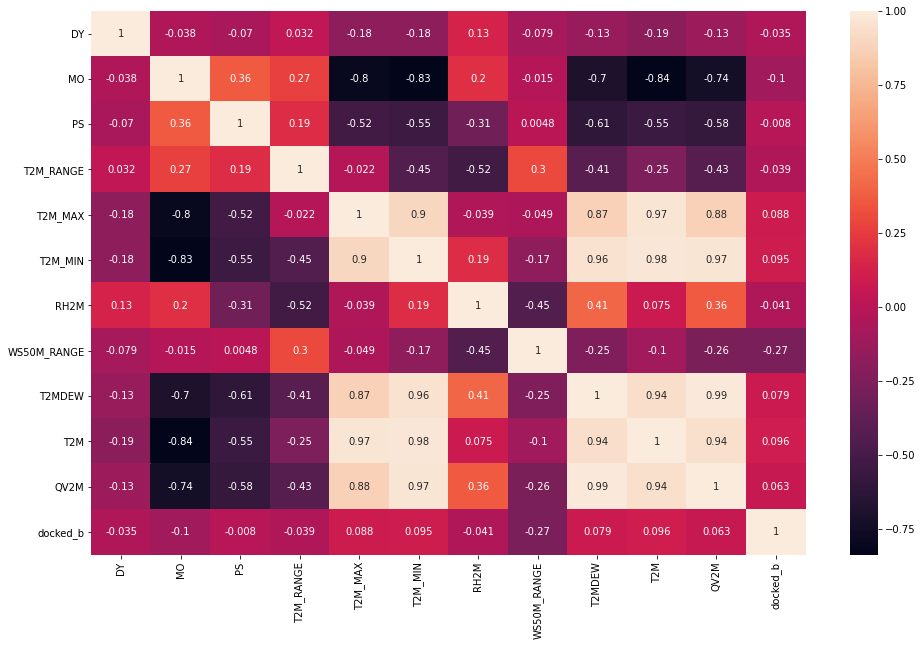

In [108]:
plt.figure(figsize=(16,10))
sns.heatmap(modified.corr(), annot=True)
plt.show()

In [109]:
docked_count = modified['docked_b'].sum()
print (docked_count)
#electric_count = modified['electric_b'].sum()
#print (electric_count)


169


In [110]:
from sklearn.svm import SVC
!pip3 install quandl
!pip3 install sklearn
import quandl, math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression

X = np.array(modified.drop(['docked_b'], 1))
y = np.array(modified['docked_b'])
X = preprocessing.scale(X)

svclassifier = SVC(kernel='poly', degree=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
svclassifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
y_pred = svclassifier.predict(X_test)


In [112]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 3 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [2 3 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         6
           2       0.11      1.00      0.20         1
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.20        15
   macro avg       0.09      0.19      0.09        15
weighted avg       0.21      0.20      0.17        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
print(y_pred)
print(y_test)

[2 2 2 2 1 1 1 2 2 5 1 3 2 2 2]
[3 6 3 1 3 3 1 1 1 4 1 1 2 3 9]


In [114]:
from sklearn import metrics
scores_regr = metrics.mean_squared_error(y_test, y_pred)
scores_regr

5.6

In [115]:

X = modified.drop(['docked_b'], 1)
y = modified['docked_b']

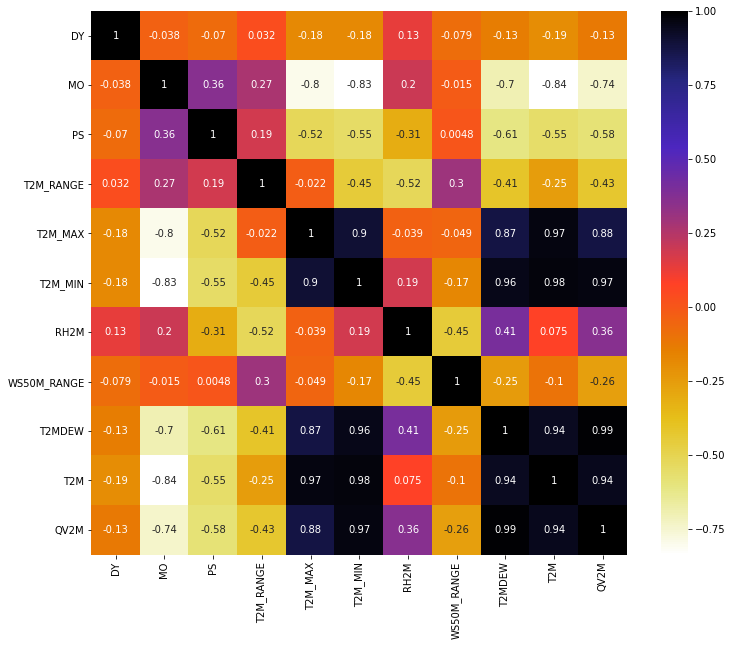

In [116]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [117]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [118]:
#corr_features = correlation(X, 0.7)
#h = X.keys()
#h = set(h);
#corr_features = h - corr_features
#print(corr_features)
#len(set(corr_features))

In [119]:
#X.drop(corr_features,axis=1)

In [120]:
#corr_features

In [121]:
X = np.array(X)
y = np.array(y)

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [123]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=20)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [125]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.4133333333333336
Mean Squared Error: 2.7079999999999997
Root Mean Squared Error: 1.6456001944579368
-0.38477272727272704


In [126]:
X = preprocessing.scale(X)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [128]:
clf = LinearRegression()

In [129]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred = np.ceil(y_pred)
y_pred

array([3., 3., 3., 3., 4., 3., 4., 4., 3., 3., 3., 3., 2., 3., 4.])

In [130]:
confidence = clf.score(X_test, y_test)
print(confidence)

-0.25022327540382316


In [131]:
con = 1 + confidence
con

0.7497767245961768

In [132]:
from sklearn.metrics import r2_score
ls = r2_score(y_test,y_pred)
ls

-0.5924657534246576

In [133]:
y_test

array([3, 1, 4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 5, 1, 5])

In [134]:
#To retrieve the intercept:
print(clf.intercept_)

#For retrieving the slope:
print(clf.coef_)

2.4734346056261
[ -0.22373923  -0.47045341   0.15103584   3.98310254 -10.60638252
   7.25166288  -3.43490219  -0.67834892  12.95101596  -4.342944
  -3.82985945]


In [135]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleLR=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleLR)

RMLSE for the data: 0.6128343141626714


In [136]:

# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
# report performance
print(scores)
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

[-2.39812552 -5.41602107 -4.69226069 -1.99563157 -2.44711123 -1.66752971
 -2.93063739 -5.7036238  -1.14421557 -1.44201245]
MSE: -2.984 (1.592)


In [137]:
# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.125      0.28571429 0.28571429 0.14285714 0.14285714 0.28571429
 0.14285714 0.14285714 0.14285714 0.28571429]
Accuracy: 0.198 (0.072)


In [138]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-5.39554794520548


In [139]:
from sklearn.metrics import mean_squared_log_error
msleDT=mean_squared_log_error(y_pred,y_test)
rmsleDT=np.sqrt(msleDT)
print('RMLSE for the data:',rmsleDT)

RMLSE for the data: 0.8965348952131073


In [140]:
# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.125      0.14285714 0.28571429 0.         0.28571429 0.42857143
 0.         0.14285714 0.28571429 0.28571429]
Accuracy: 0.198 (0.132)


In [141]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-2.4525042808219184


In [142]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF)

RMLSE for the data: 0.7158041092856727


In [143]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)
print(confidence)


0.3181818181818182


In [144]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB)

RMLSE for the data: 0.5608750520367111


In [145]:
# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# evaluate model
scores = cross_val_score(abc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.25       0.28571429 0.28571429 0.14285714 0.28571429 0.42857143
 0.42857143 0.28571429 0.57142857 0.28571429]
Accuracy: 0.325 (0.113)


In [146]:
modified = df2

In [147]:
X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

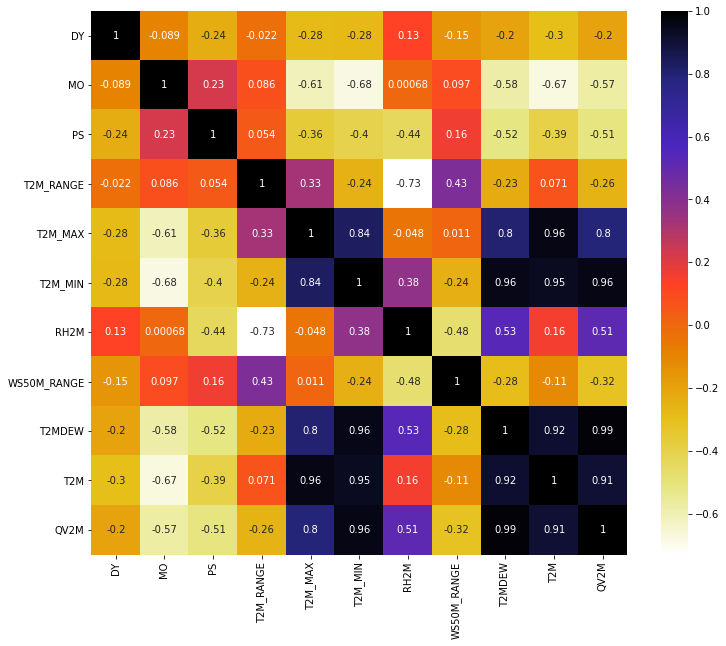

In [148]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [149]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [150]:
#corr_features = correlation(X, 0.7)
#len(set(corr_features))

In [151]:
#X.drop(corr_features,axis=1)

In [152]:
#corr_features

In [153]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [154]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


-0.5804256605028366


In [155]:
U=clf.predict(X_test)
U

array([1.38071642, 2.40300851, 1.77152439, 0.99302366, 2.05288219,
       2.17016806, 2.5083524 , 2.61690303])

In [156]:
y_test

7      3
91     3
40     1
21     2
96     1
107    1
54     2
84     2
Name: electric_b, dtype: int64

In [157]:
clf.score(X_test,y_test)

-0.5804256605028366

In [158]:
from sklearn.model_selection import KFold # import KFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
#y = np.array([1, 2, 3, 4]) # Create another array
#X = modified.drop(['PS','electric_b','count'], 1)
#y = modified['electric_b']
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [159]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [160]:
# Perform 6-fold cross validation
cv_4_results = cross_val_score(clf, X, y, cv=25,)
cv_4_results = abs(cv_4_results)
print ('Cross-validated scores:', abs(cv_4_results))
print('mean score', mean(cv_4_results))


Cross-validated scores: [0.         0.71405384 0.         0.         0.         0.48564132
 0.15321209 1.48520273 0.         1.34434818 3.36426786 6.99626351
 0.         2.33449125        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan]
mean score nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

In [161]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [162]:

X = modified.drop(['electric_b'], 1)
y = modified['electric_b']

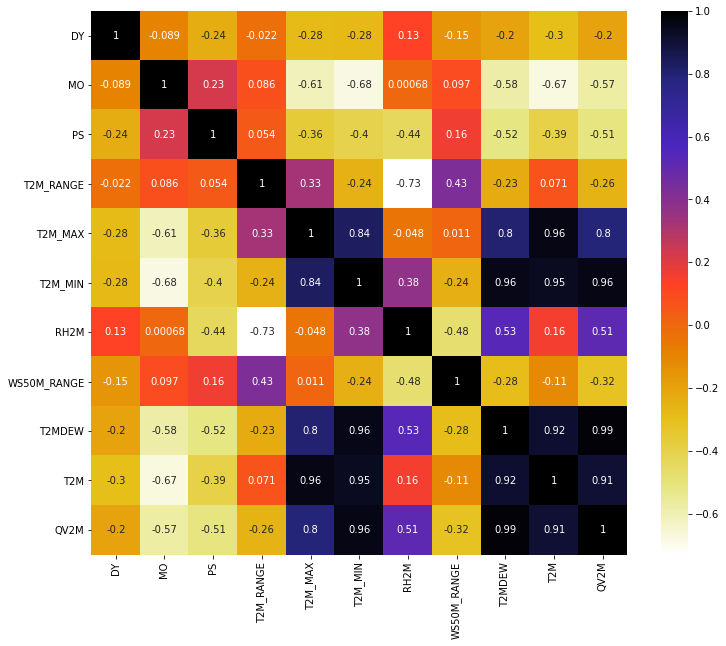

In [163]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [164]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [165]:
#corr_features = correlation(X, 0.8)
#len(set(corr_features))

In [166]:
#X.drop(corr_features,axis=1)

In [167]:
#corr_features

In [168]:

X = np.array(X)
y = np.array(y)

In [169]:
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression()

In [170]:
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)


-0.6176795585746704


In [171]:
y_pred = clf.predict(X_test)

In [172]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleLR1=np.sqrt(msle)
print('RMLSE for the data:',rmsleLR1)

RMLSE for the data: 0.4094374061435444


In [173]:

# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
# report performance
print(scores)
print('MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

[-0.95026123 -3.65212182 -2.01535392 -1.52955691 -0.65084675 -0.51448516
 -1.07544076 -0.1156546  -1.60215891 -0.39029937]
MSE: -1.250 (0.980)


In [174]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-1.75


In [175]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleDT1=np.sqrt(msle)
print('RMLSE for the data:',rmsleDT1)

RMLSE for the data: 0.5528731433346898


In [176]:
# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.         0.25       0.25       0.25       0.         0.
 0.         0.25       0.         0.33333333]
Accuracy: 0.133 (0.135)


In [177]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
confidence = regressor.score(X_test, y_test)
print(confidence)

-0.4337500000000001


In [178]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleRF1=np.sqrt(msle)
print('RMLSE for the data:',rmsleRF1)

RMLSE for the data: 0.3938337892819097


In [179]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
confidence = abc.score(X_test, y_test)
print(confidence)


0.25


In [180]:
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(y_pred,y_test)
rmsleADB1=np.sqrt(msle)
print('RMLSE for the data:',rmsleADB1)

RMLSE for the data: 0.4128133770165078


In [181]:
# evaluate  regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# create dataset

#X = np.array(modified.drop(['PS','docked_b','count'], 1))
#y = np.array(modified['docked_b'])
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# evaluate model
scores = cross_val_score(abc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print(scores)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.75 0.   0.25 0.25 0.25 0.25 0.25 0.25 0.5  1.  ]
Accuracy: 0.375 (0.280)


In [183]:
import pandas as pd

cars = {'type': ['Linear Regression', 'Decision Tree','Random Forest','ADA Boost'],
        'RMSLE(Docked Bike)': [rmsleLR,rmsleDT,rmsleRF,rmsleADB],
        'RMSLE(Electric Bike]' : [rmsleLR1,rmsleDT1,rmsleRF1,rmsleADB1]
        }

df = pd.DataFrame(cars, columns = ['type', 'RMSLE(Docked Bike)','RMSLE(Electric Bike]'])
df

,type,RMSLE(Docked Bike),RMSLE(Electric Bike]
0,Linear Regression,0.612834,0.409437
1,Decision Tree,0.896535,0.552873
2,Random Forest,0.715804,0.393834
3,ADA Boost,0.560875,0.412813
